In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("teleCust1000t.csv")

In [ ]:
df.head()

In [5]:
df.shape

(1000, 12)

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df["custcat"].value_counts()

In [ ]:
sns.barplot(x="gender", y="custcat", data=df)

In [ ]:
sns.lineplot(x="custcat", y="age", data=df)

In [ ]:
sns.lineplot(x="custcat", y="income", data=df)

In [92]:
X = df.drop("custcat", axis=1).values
y = df["custcat"].values

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4242)

In [94]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [95]:
knn = KNeighborsClassifier(n_neighbors=250)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=250)

In [96]:
y_pred = knn.predict(X_test_scaled)

In [97]:
ac1 = accuracy_score(y_test, y_pred)

In [98]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=1000)

In [99]:
y_pred = rf.predict(X_test_scaled)

In [100]:
ac2 = accuracy_score(y_test, y_pred)

In [101]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=50)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50)

In [102]:
y_pred = dt.predict(X_test_scaled)

In [103]:
ac3 = accuracy_score(y_test, y_pred)

In [104]:
ada = AdaBoostClassifier(n_estimators=250)
ada.fit(X_train_scaled, y_train)

AdaBoostClassifier(n_estimators=250)

In [105]:
y_pred = ada.predict(X_test_scaled)

In [106]:
ac4 = accuracy_score(y_test, y_pred)

In [107]:
names = ["KNN", "RF", "DT", "ADA"]
scores = [ac1, ac2, ac3, ac4]

In [108]:
models = pd.DataFrame({"Model": names, "Score": scores})
models.head()

,Model,Score
0,KNN,0.370000
1,RF,0.360000
2,DT,0.363333
3,ADA,0.343333


<AxesSubplot: xlabel='Model', ylabel='Score'>

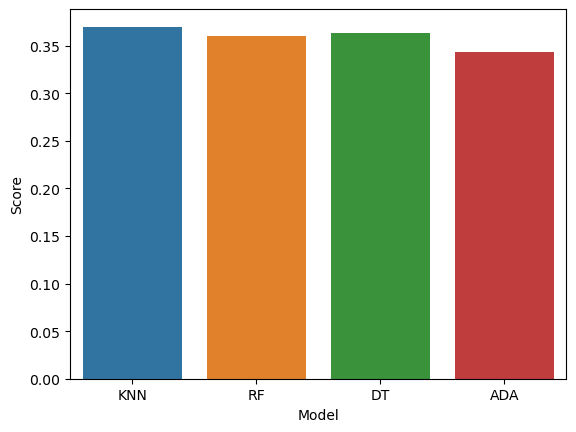

In [110]:
sns.barplot(x="Model", y="Score", data=models)

In [109]:
pickle.dump(rf, open("knn.pkl", "wb"))